# Plot flux variables during 16-19 July 2022
- This script is used to plot daytime and nighttime flux variables during 16-19 July 2022.
- Simulations: GM_SLUCM, GM_CLMU. 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [3]:
df_flux = pd.read_csv('./data_for_figure/fluxs.csv')
df_flux

,tag,model,location,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,GRDFLX,...,PSFC,time,SWUP,LWUP,LWDOWN,netLW,NET,GRD,RH2M,W10M
0,01:30,wrf,region,0.000000,348.866905,2.044273,0.040389,0.053288,0.971141,69.158785,...,101484.601562,2022-07-17 13:00:00,0.000000,405.344946,338.798969,-66.545977,-66.545977,-68.630639,49.618172,0.815662
1,01:30,wrf,sp,0.000000,350.552872,2.946615,-0.038948,0.018000,0.980000,74.658381,...,101627.517578,2022-07-17 13:00:00,0.000000,415.419271,343.541821,-71.877450,-71.877450,-74.785118,47.709363,0.645768
2,01:30,wrf-ctsm,region,0.000000,345.692520,-6.751510,1.175791,0.300000,1.000000,0.000000,...,101489.017578,2022-07-17 13:00:00,0.000000,404.872779,345.692520,-59.180258,-59.180258,-53.604539,54.397218,0.699990
3,01:30,wrf-ctsm,sp,0.000000,347.329132,-5.905338,0.274503,0.300000,1.000000,0.000000,...,101632.197266,2022-07-17 13:00:00,0.000000,409.267839,347.329132,-61.938707,-61.938707,-56.307873,52.112415,0.787207
4,13:30,wrf,region,761.343674,369.882721,261.777489,34.837578,0.166591,0.971141,-133.966965,...,101181.816406,2022-07-18 01:00:00,126.832975,524.906627,359.208290,-165.698337,468.812361,172.197294,25.464890,3.750203
5,13:30,wrf,sp,759.691040,370.210983,279.180534,2.531059,0.154772,0.980000,-143.020090,...,101321.359375,2022-07-18 01:00:00,117.579169,533.919043,362.806771,-171.112272,470.999598,189.288005,24.866259,3.768751
6,13:30,wrf-ctsm,region,757.197693,370.730644,274.873180,90.316739,0.141429,1.000000,0.000000,...,101175.244141,2022-07-18 01:00:00,107.089537,539.696499,370.730644,-168.965855,481.142301,115.952381,23.080747,3.288378
7,13:30,wrf-ctsm,sp,763.619705,371.351341,276.730949,93.419388,0.132765,1.000000,0.000000,...,101314.542969,2022-07-18 01:00:00,101.382140,544.611765,371.351341,-173.260423,488.977142,118.826805,22.666465,3.161051


In [24]:
vars_to_plot = ['SWDOWN', 'SWUP', 'LWDOWN', 'LWUP', 'NET', 'HFX', 'LH', 'GRD']
tag_list = ['13:30', '01:30']
xticks_list = [
    r'$SW_\mathrm{down}$',
    r'$SW_\mathrm{up}$',
    r'$LW_\mathrm{down}$',
    r'$LW_\mathrm{up}$',
    r'$R_\mathrm{n}$',
    r'$Q_\mathrm{h}$',
    r'$Q_\mathrm{le}$',
    r'$Q_\mathrm{s}$'
]
fontsize = 6
#location_list = ['City center', 'Main urban area']
location_list = ['sp', 'region']
model_list = ['wrf', 'wrf-ctsm']
boundarywidth = 0.5
labelcolor = '#6b6b6b'
fontsize = 6
title_list = ['City center 13:30', 'City center 01:30', 'Main urban area 13:30', 'Main urban area 01:30']
labelsize = 6
padding = 4
linewidth = 0.5
labelfont = 6
pad = 2
xwidth = 0.5
length = 2
lc1 = '#1f78b4'
lc2 = '#e31a1c'
lc = [lc1, lc2, lc2]
alpha_list = [1, 1, 0.5]
handletextpad = 0.5
label_list = ['GM_SLUCM', 'GM_CLMU']
xoffset = 0.085
yoffset = 0.075
xloc = 0.15
xloc2 = 0.325
xloc3 = 0.55
xloc4 = 0.8
pct_urban_list = np.round([[90.0, 48.53323133720719], [74.55621337890625, 39.48793663358253]],1)

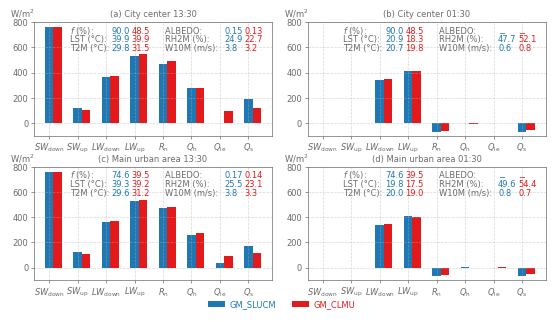

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(5.5, 3), sharey=True)
ax = axes.flatten()

for i in range(4):
    time_i = tag_list[i%2]
    df_j = df_flux[df_flux['tag'] == time_i]
    sel_location = i // 2
    df_i = df_j[df_j['location'] == location_list[sel_location]]
    pct_urban = pct_urban_list[sel_location]
    for j, model in enumerate(model_list):
        df_model = df_i[df_i['model'] == model]
        values = df_model[vars_to_plot].values.flatten()
        x = range(len(vars_to_plot))
        bar_pos = [val + j*0.3 for val in x]  # slight offset between models

        ax[i].bar(bar_pos, values, width=0.3, label=label_list[j], color=lc[j], alpha=alpha_list[j])
        if time_i == '01:30':
            albedo_value = r'$-$'
        else:
            albedo_value = np.round(df_model['ALBEDO'].item(),2)
        ax[i].text(xloc2 + xoffset * j, 0.9, pct_urban[j], 
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)     
        ax[i].text(xloc2 + xoffset * j, 0.9 - yoffset, np.round(df_model['TSK'].item()-273.15,1),
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc2 + xoffset * j, 0.9 - 2*yoffset, np.round(df_model['T2'].item()-273.15,1),
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc4 + xoffset * j, 0.9, albedo_value, 
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc4 + xoffset * j, 0.9 - yoffset, np.round(df_model['RH2M'].item(),1),
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
        ax[i].text(xloc4 + xoffset * j, 0.9 - 2*yoffset, np.round(df_model['W10M'].item(),1),
                   color = lc[j], fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].set_xticks(range(len(vars_to_plot)))
    ax[i].set_xticklabels(xticks_list, fontsize=fontsize)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i]}', fontsize=labelsize, color=labelcolor, pad=padding)
    ax[i].set_ylim(-100, 800)
    ax[i].set_ylabel('W/$\mathrm{m}^2$', fontsize=fontsize, color=labelcolor, rotation=0, ha='center', labelpad=2.5)
    ax[i].yaxis.set_label_coords(-0.05, 1.0225)  
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,
                      labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,
                      labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].grid(True,linestyle='--',linewidth=linewidth, alpha=0.5)
    ax[i].text(xloc, 0.9, r'$f$ (%): ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc, 0.9-yoffset, 'LST (°C): ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc, 0.9-2*yoffset, 'T2M (°C): ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc3, 0.9, 'ALBEDO: ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc3, 0.9-yoffset, 'RH2M (%): ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    ax[i].text(xloc3, 0.9-2*yoffset, 'W10M (m/s): ', color = labelcolor, fontsize=fontsize, transform=ax[i].transAxes)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.02), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=3)
for i, text in enumerate(legend.get_texts()):
    text.set_color(lc[i])
plt.subplots_adjust(left=0.05, right=0.98, bottom=0.1, top=0.96, wspace=0.15, hspace=0.275) 
plt.savefig('flux_2simulation.png', dpi=300)
plt.savefig('flux_2simulation.pdf', dpi=600)

# Description

In [3]:
df_flux_wrf = df_flux[df_flux['model'] == 'wrf']
df_flux_wrf

,tag,model,location,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,GRDFLX,...,V10,Q2,PSFC,time,SWUP,LWUP,NET,GRD,RH2M,W10M
0,01:30,wrf,region,0.000000,348.866905,2.044273,0.040389,0.053288,0.971141,69.158785,...,0.808268,0.007204,101484.601562,2022-07-17 13:00:00,0.000000,405.344946,-66.545977,-68.630639,49.618172,0.815662
1,01:30,wrf,sp,0.000000,351.151047,2.901377,-0.047547,0.018000,0.980000,74.196770,...,0.607649,0.007203,101587.380859,2022-07-17 13:00:00,0.000000,415.629189,-71.501157,-74.354987,47.655306,0.620683
6,13:30,wrf,region,761.343674,369.882721,261.777489,34.837578,0.166591,0.971141,-133.966965,...,3.430264,0.006580,101181.816406,2022-07-18 01:00:00,126.832975,524.906627,468.812361,172.197294,25.464890,3.750203
7,13:30,wrf,sp,766.611328,370.364517,280.878479,3.857028,0.154772,0.980000,-145.245518,...,3.501823,0.006459,101282.261719,2022-07-18 01:00:00,118.650236,534.255994,476.662332,191.926825,24.795976,3.798517


In [4]:
np.round(df_flux_wrf[(df_flux_wrf['location']=='sp') & (df_flux_wrf['tag']=='13:30')]['GRDFLX'],1)

7   -145.2
Name: GRDFLX, dtype: float64

In [12]:
np.round(df_flux_wrf[(df_flux_wrf['location']=='sp') & (df_flux_wrf['tag']=='13:30')]['LH'],1)

7    3.9
Name: LH, dtype: float64

In [13]:
df_flux_wrf_day_sp = df_flux_wrf[(df_flux_wrf['tag'] == '13:30') & (df_flux_wrf['location'] == 'sp')]
print(np.round(100*df_flux_wrf_day_sp['HFX'] / df_flux_wrf_day_sp['NET'],1),
      np.round(100*df_flux_wrf_day_sp['LH'] / df_flux_wrf_day_sp['NET'],1),
      np.round(100*df_flux_wrf_day_sp['GRD'] / df_flux_wrf_day_sp['NET'],1))

7    58.9
dtype: float64 7    0.8
dtype: float64 7    40.3
dtype: float64


In [5]:
np.round(df_flux_wrf[(df_flux_wrf['location']=='region') & (df_flux_wrf['tag']=='13:30')]['GRDFLX'],1)

6   -134.0
Name: GRDFLX, dtype: float64

In [6]:
df_flux_wrf_ctsm = df_flux[df_flux['model'] == 'wrf-ctsm']
df_flux_wrf_ctsm

,tag,model,location,SWDOWN,GLW,HFX,LH,ALBEDO,EMISS,GRDFLX,...,V10,Q2,PSFC,time,SWUP,LWUP,NET,GRD,RH2M,W10M
2,01:30,wrf-ctsm,region,0.000000,345.692520,-6.751510,1.175791,0.300000,1.0,0.0,...,0.542343,0.007430,101489.017578,2022-07-17 13:00:00,0.000000,404.872779,-59.180258,-53.604539,54.397218,0.699990
3,01:30,wrf-ctsm,sp,0.000000,347.467148,-5.498426,0.260224,0.300000,1.0,0.0,...,0.544457,0.007434,101592.498047,2022-07-17 13:00:00,0.000000,409.304734,-61.837587,-56.599385,52.101288,0.782439
8,13:30,wrf-ctsm,region,757.197693,370.730644,274.873180,90.316739,0.141429,1.0,0.0,...,2.996389,0.006524,101175.244141,2022-07-18 01:00:00,107.089537,539.696499,481.142301,115.952381,23.080747,3.288378
9,13:30,wrf-ctsm,sp,757.155670,371.723526,276.216072,91.600830,0.132959,1.0,0.0,...,2.906134,0.006485,101275.447266,2022-07-18 01:00:00,100.670828,544.464243,483.744125,115.927223,22.622622,3.145160


In [7]:
df_flux_wrf_ctsm_day_sp = df_flux_wrf_ctsm[(df_flux_wrf_ctsm['tag'] == '13:30') & (df_flux_wrf_ctsm['location'] == 'sp')]
print(np.round(100*df_flux_wrf_ctsm_day_sp['HFX'] / df_flux_wrf_ctsm_day_sp['NET'],1),
      np.round(100*df_flux_wrf_ctsm_day_sp['LH'] / df_flux_wrf_ctsm_day_sp['NET'],1),
      np.round(100*df_flux_wrf_ctsm_day_sp['GRD'] / df_flux_wrf_ctsm_day_sp['NET'],1))

9    57.1
dtype: float64 9    18.9
dtype: float64 9    24.0
dtype: float64
